# Analysis
- Instagram posts by Brazilian Ministery of Health (march to may) 

### Libraries

In [1]:
# Data
import pandas as pd
import numpy as np

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

### Graphs' style

In [2]:
%config InlineBackend.figure_format='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### Data import

In [3]:
df_geral=pd.read_csv("../data/ms_geral.csv")

### Replace values

In [4]:
df_geral=df_geral.replace("sim",1)
df_geral=df_geral.replace("siim",1)
df_geral=df_geral.replace("sim ",1)
df_geral=df_geral.replace("nao",0)
df_geral=df_geral.replace("não",0)
df_geral=df_geral.replace("sim | nao","inconclusivo")

### Fix date format

In [5]:
df_geral["dia_publicacao"]=df_geral["dia_publicacao"].str.replace("/","-")
df_geral["dia_publicacao"]=df_geral["dia_publicacao"]+"-2020"

In [6]:
df_geral["dia_publicacao"]=pd.to_datetime(df_geral["dia_publicacao"],dayfirst=True)

In [7]:
df_geral=df_geral.rename({'dia_publicacao': 'data'}, axis=1)

In [8]:
df_geral.head()

,texto,ministro,link,data,pandemia,morte_publicacao,atualizacao_casos,noticia_falsa,recomendacao_publicacao,situacao_atual,tipo_publicacao,origem_publicacao,publico_alvo\n
0,minsaude\r\nVerificado\r\n🇧🇷O Governo do Brasi...,mandetta,https://www.instagram.com/p/B96odaGATbI/,2020-03-19,1,0,0,0,0,0,arte,ms,geral
1,minsaude\r\nVerificado\r\nCoronavírus | Orient...,mandetta,https://www.instagram.com/p/B97PHlGA3lP/,2020-03-19,1,0,0,0,1,0,video,ms,geral
2,minsaude\r\nVerificado\r\n🔬“Este é o ano dos l...,mandetta,https://www.instagram.com/p/B97ibkWg1DT/,2020-03-19,1,0,0,0,0,0,foto,ms,geral
3,minsaude\r\nVerificado\r\nO Brasil 🇧🇷 unindo f...,mandetta,https://www.instagram.com/p/B970wa_A-fD/,2020-03-19,1,0,0,0,1,0,arte,ms,geral
4,minsaude\r\nVerificado\r\nO envolvimento de to...,mandetta,https://www.instagram.com/p/B9761PBga_O/,2020-03-19,1,0,0,0,1,0,arte,ms,Idosos


### Dataframe with pandemic posts information

In [9]:
df_pandemic=df_geral[df_geral['pandemia']==1]

In [10]:
df_pandemic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 445
Data columns (total 13 columns):
texto                      350 non-null object
ministro                   350 non-null object
link                       349 non-null object
data                       350 non-null datetime64[ns]
pandemia                   350 non-null int64
morte_publicacao           350 non-null int64
atualizacao_casos          350 non-null object
noticia_falsa              350 non-null int64
recomendacao_publicacao    350 non-null int64
situacao_atual             350 non-null object
tipo_publicacao            350 non-null object
origem_publicacao          350 non-null object
publico_alvo
              350 non-null object
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 38.3+ KB


# RESULTS

### df_geral: all posts

#### Overview of fact-checking posts

In [11]:
df_geral["noticia_falsa"].value_counts()

0    437
1      9
Name: noticia_falsa, dtype: int64

In [12]:
noticiafalsa=pd.DataFrame(df_geral["noticia_falsa"].value_counts())

In [13]:
# Criando tabela com index e chamando as colunas
noticiafalsa=pd.DataFrame(df_geral["noticia_falsa"].value_counts())
noticiafalsa=noticiafalsa.reset_index()
noticiafalsa.columns=["noticia_falsa","qtd"]

# Substituindo valores
noticiafalsa["noticia_falsa"]=noticiafalsa["noticia_falsa"].replace(1,"sim") 
noticiafalsa["noticia_falsa"]=noticiafalsa["noticia_falsa"].replace(0,"não")  

#Trocando os nomes
noticiafalsa=noticiafalsa.rename({'noticia_falsa': 'Notícias falsas'}, axis=1)

# Visualizar
noticiafalsa

,Notícias falsas,qtd
0,não,437
1,sim,9


#### Which minister has the most fact-checking posts?

In [14]:
# Tabela dos ministros
df_minister=df_geral[df_geral['noticia_falsa']==1][['ministro','noticia_falsa']]
df_minister=df_minister.reset_index(drop=True)
df_minister=df_minister.rename({'noticia_falsa': 'Notícias falsas'}, axis=1)
df_minister=df_minister.rename({'ministro': 'Ministro'}, axis=1)

In [15]:
df_minister.head()

,Ministro,Notícias falsas
0,mandetta,1
1,mandetta,1
2,mandetta,1
3,mandetta,1
4,mandetta,1


In [16]:
df_mandetta=df_geral[df_geral['noticia_falsa']>0][df_geral['ministro']=="mandetta"][['ministro','noticia_falsa']]
df_mandetta=df_mandetta.reset_index(drop = True)

df_pazuello=df_geral[df_geral['noticia_falsa']>0][df_geral['ministro']=="pazuello"][['ministro','noticia_falsa']]
df_pazuello=df_pazuello.reset_index(drop=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


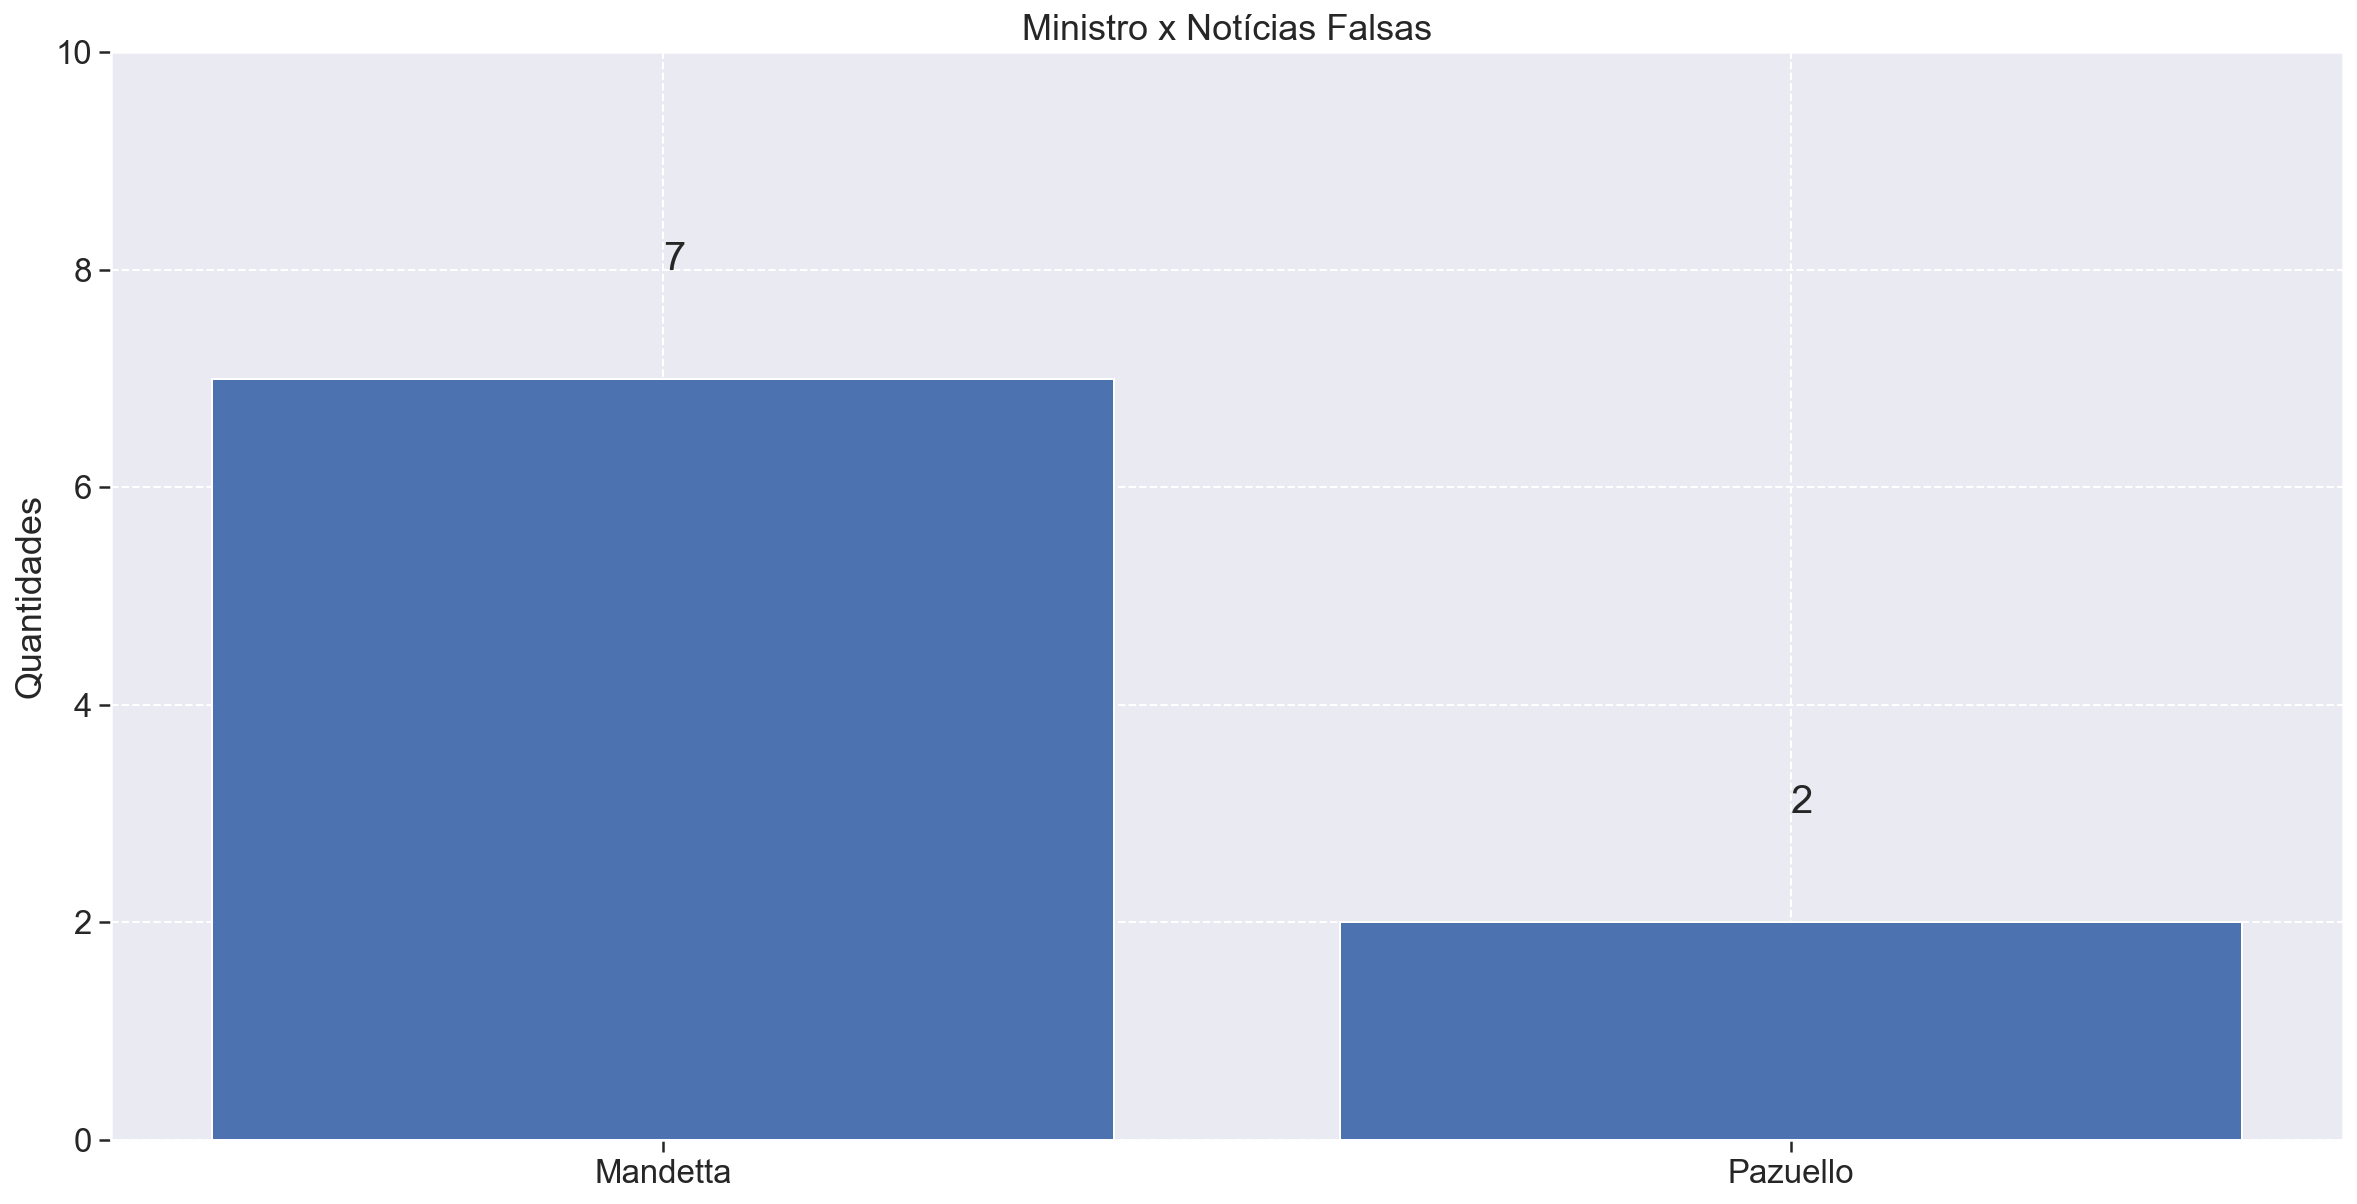

In [17]:
fig=plt.figure(figsize=(20,10))

# Make a fake dataset:
height=[len(df_mandetta), len(df_pazuello)]
bars=('Mandetta', 'Pazuello')
x_pos=np.arange(len(bars))
 
# Create bars
plt.bar(x_pos, height)
 
# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.yticks(np.arange(0, 12, 2))

# Text on the top of each barplot
for i in range(len(height)):
    plt.text(x = x_pos[i] -.0, y = height[i]+1, s = height[i], size = 20)
    
# Titles
plt.title('Ministro x Notícias Falsas')
plt.ylabel('Quantidades')

# Show graphic
plt.show()

#### Post's type

In [18]:
df_geral["tipo_publicacao"].value_counts()

arte             252
video            101
arte | print      30
print             26
arte | foto       18
foto              11
arte | video       7
documento          1
Name: tipo_publicacao, dtype: int64

In [19]:
tipo=pd.DataFrame(df_geral["tipo_publicacao"].value_counts())
tipo=tipo.reset_index()
tipo.columns=["tipo_publicacao","qtd"]
tipo=tipo.rename({'tipo_publicacao': 'Tipo de publicação'}, axis=1)
tipo

,Tipo de publicação,qtd
0,arte,252
1,video,101
2,arte | print,30
3,print,26
4,arte | foto,18
5,foto,11
6,arte | video,7
7,documento,1


### df_pandemic: only pandemic posts

#### How many publications are "atualizacao_casos"?

In [20]:
df_pandemic["atualizacao_casos"].value_counts()

0               279
1                67
inconclusivo      4
Name: atualizacao_casos, dtype: int64

In [21]:
# Create variable
atualizacao=pd.DataFrame(df_pandemic["atualizacao_casos"].value_counts())
atualizacao=atualizacao.reset_index()
atualizacao.columns=["atualizacao_casos","qtd"]

# Replace values
atualizacao["atualizacao_casos"]=atualizacao["atualizacao_casos"].replace(1,"sim") 
atualizacao["atualizacao_casos"]=atualizacao["atualizacao_casos"].replace(0,"não") 

# Rename
atualizacao=atualizacao.rename({'atualizacao_casos': 'Atualização de casos'}, axis=1)

# Show
atualizacao

,Atualização de casos,qtd
0,não,279
1,sim,67
2,inconclusivo,4


#### Which minister did report the most about the pandemic?

In [22]:
ministros_atualizacao=df_pandemic[df_pandemic['atualizacao_casos']==1][['ministro','atualizacao_casos']]
ministros_atualizacao=ministros_atualizacao.reset_index(drop=True)
ministros_atualizacao=ministros_atualizacao.rename({'atualizacao_casos': 'Atualização de casos'}, axis=1)
ministros_atualizacao=ministros_atualizacao.rename({'ministro': 'Ministro'}, axis=1)

In [23]:
ministros_atualizacao["Ministro"].value_counts().to_frame().reset_index()

,index,Ministro
0,teich,27
1,mandetta,22
2,pazuello,18


In [24]:
mandetta_atualizacao=df_pandemic[df_pandemic['atualizacao_casos']==1][df_pandemic['ministro']=="mandetta"][['ministro','atualizacao_casos']]
mandetta_atualizacao=mandetta_atualizacao.reset_index(drop=True)

teich_atualizacao=df_pandemic[df_pandemic['atualizacao_casos']==1][df_pandemic['ministro']=="teich"][['ministro','atualizacao_casos']]
teich_atualizacao=teich_atualizacao.reset_index(drop=True)

pazuello_atualizacao=df_pandemic[df_pandemic['atualizacao_casos']==1][df_pandemic['ministro']=="pazuello"][['ministro','atualizacao_casos']]
pazuello_atualizacao=pazuello_atualizacao.reset_index(drop=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


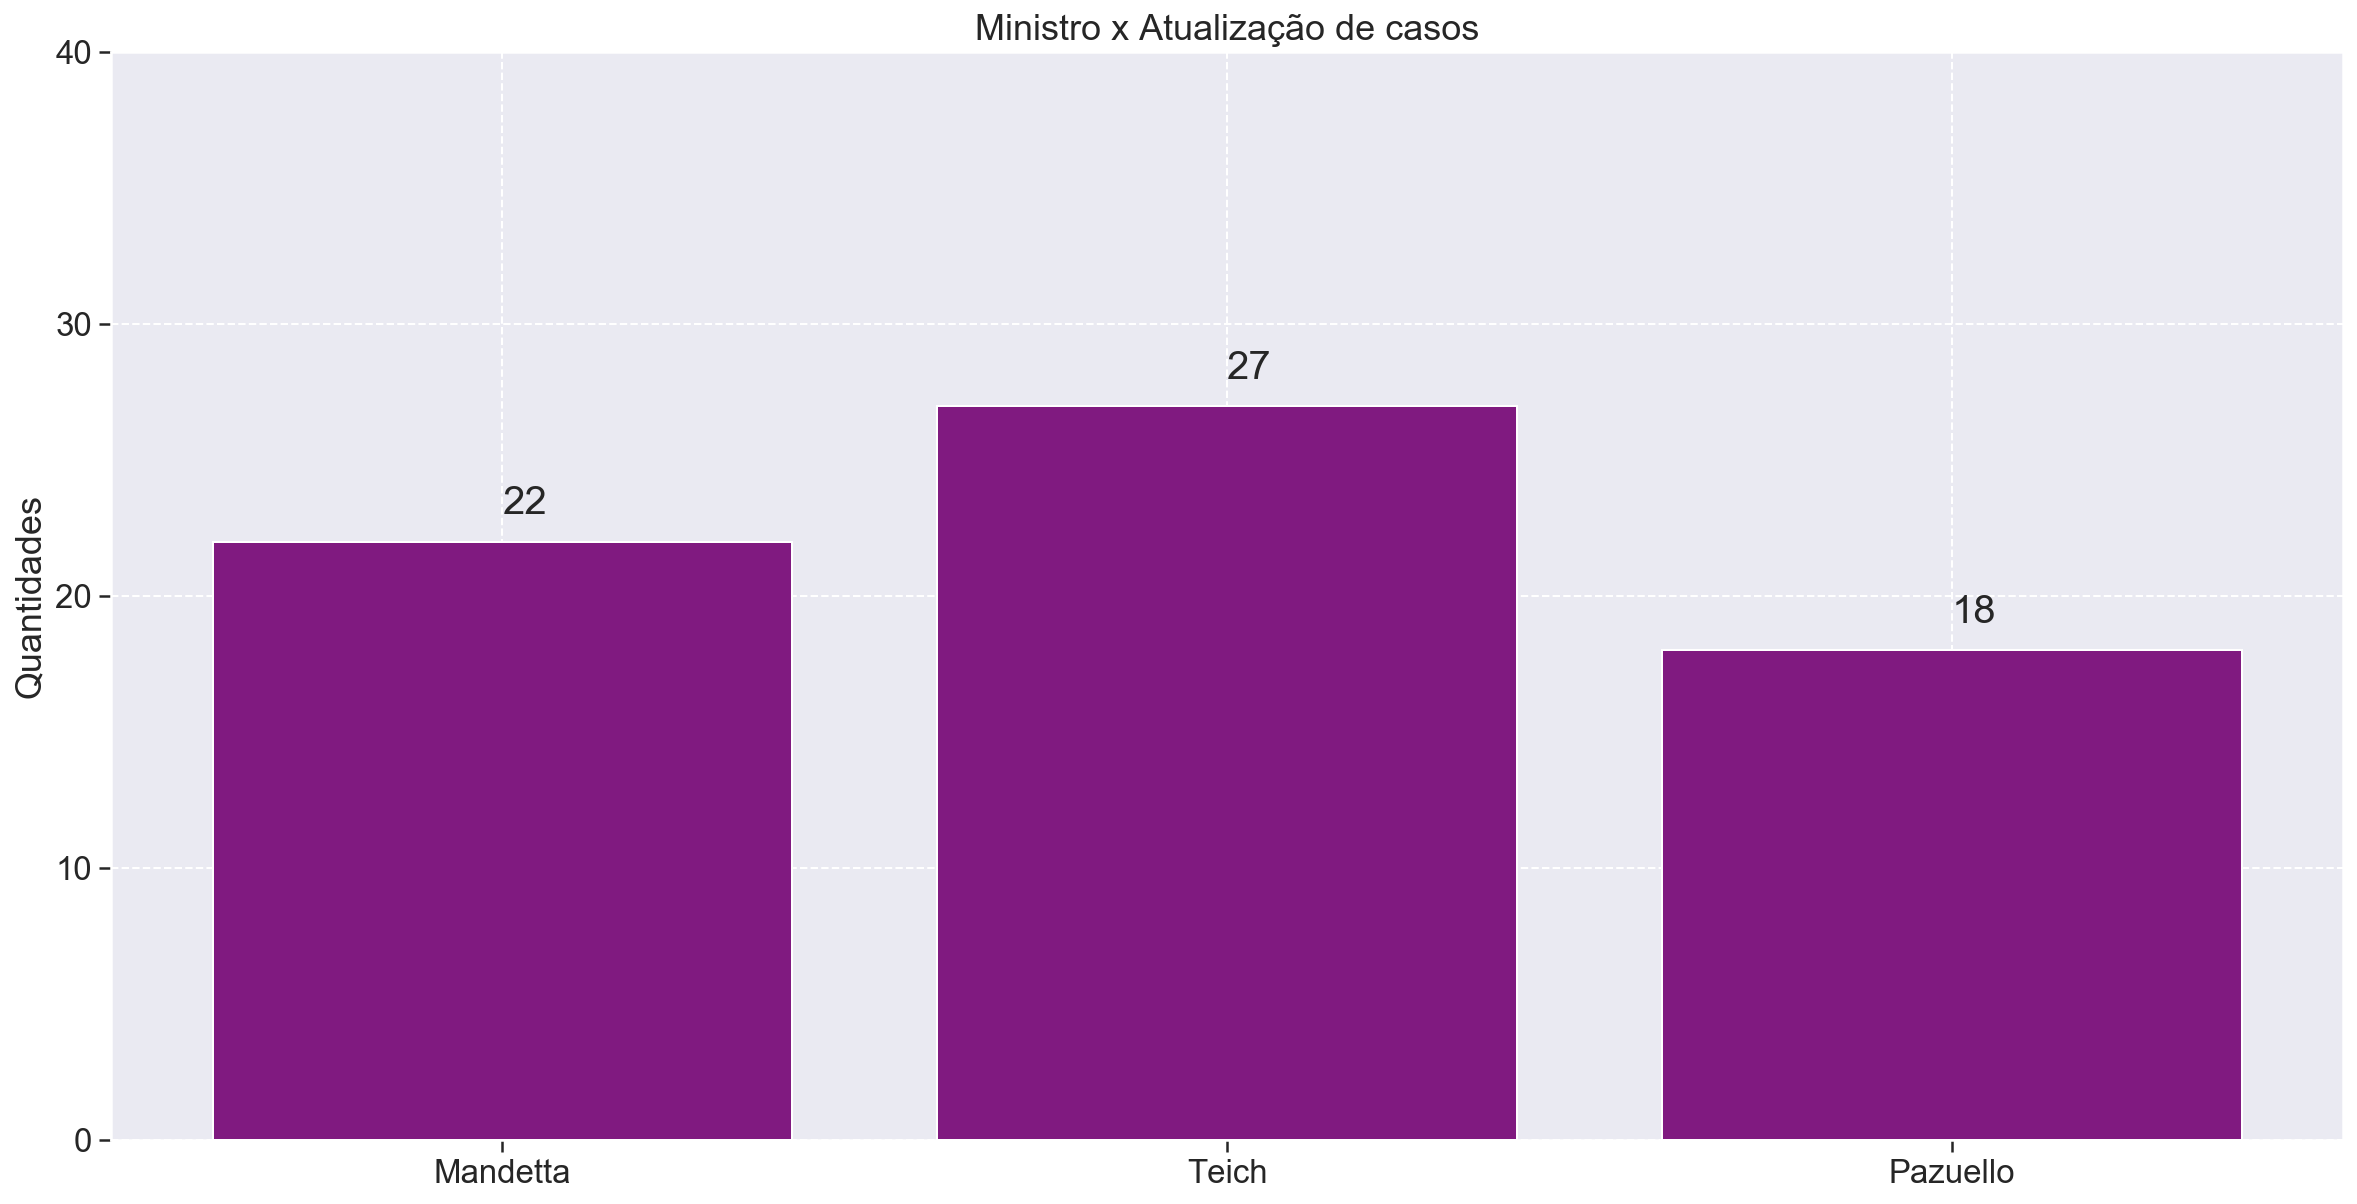

In [25]:
fig=plt.figure(figsize=(20,10))

# Make a fake dataset:
height=[len(mandetta_atualizacao), len(teich_atualizacao), len(pazuello_atualizacao)]
bars=('Mandetta', 'Teich', 'Pazuello')
x_pos=np.arange(0,3,1)
 
# Create bars
plt.bar(x_pos, height)

# Colors
plt.bar(x_pos, height, color = (0.5,0.1,0.5))
 
# Create names on the x-axis
plt.xticks(x_pos, bars, rotation=0)

plt.yticks(np.arange(0, 50, 10))

# Titles
plt.title('Ministro x Atualização de casos')
plt.ylabel('Quantidades')

# Text on the top of each barplot
for i in range(len(height)):
    plt.text(x = x_pos[i] -.0, y = height[i]+1, s = height[i], size = 20)
    # plt.text(x = -.4, y = height[0]+1, s = height[0], size = 22)


# Show graphic
plt.show()

#### Which minister did most mention death in the pandemic publications?

In [26]:
ministros_morte=df_pandemic[df_pandemic['morte_publicacao']==1][['ministro','morte_publicacao']]
ministros_morte=ministros_morte.reset_index(drop=True)
ministros_morte=ministros_morte.rename({'morte_publicacao': 'Menciona morte'}, axis=1)
ministros_morte=ministros_morte.rename({'ministro': 'Ministro'}, axis=1)

In [27]:
ministros_morte.head()

,Ministro,Menciona morte
0,mandetta,1
1,mandetta,1
2,mandetta,1
3,mandetta,1
4,mandetta,1


In [28]:
mandetta_morte=df_pandemic[df_pandemic['morte_publicacao']>0][df_pandemic['ministro']=="mandetta"][['ministro','morte_publicacao']]
mandetta_morte=mandetta_morte.reset_index(drop=True)

teich_morte=df_pandemic[df_pandemic['morte_publicacao']>0][df_pandemic['ministro']=="teich"][['ministro','morte_publicacao']]
teich_morte=teich_morte.reset_index(drop=True)

pazuello_morte=df_pandemic[df_pandemic['morte_publicacao']>0][df_pandemic['ministro']=="pazuello"][['ministro','morte_publicacao']]
pazuello_morte=pazuello_morte.reset_index(drop=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


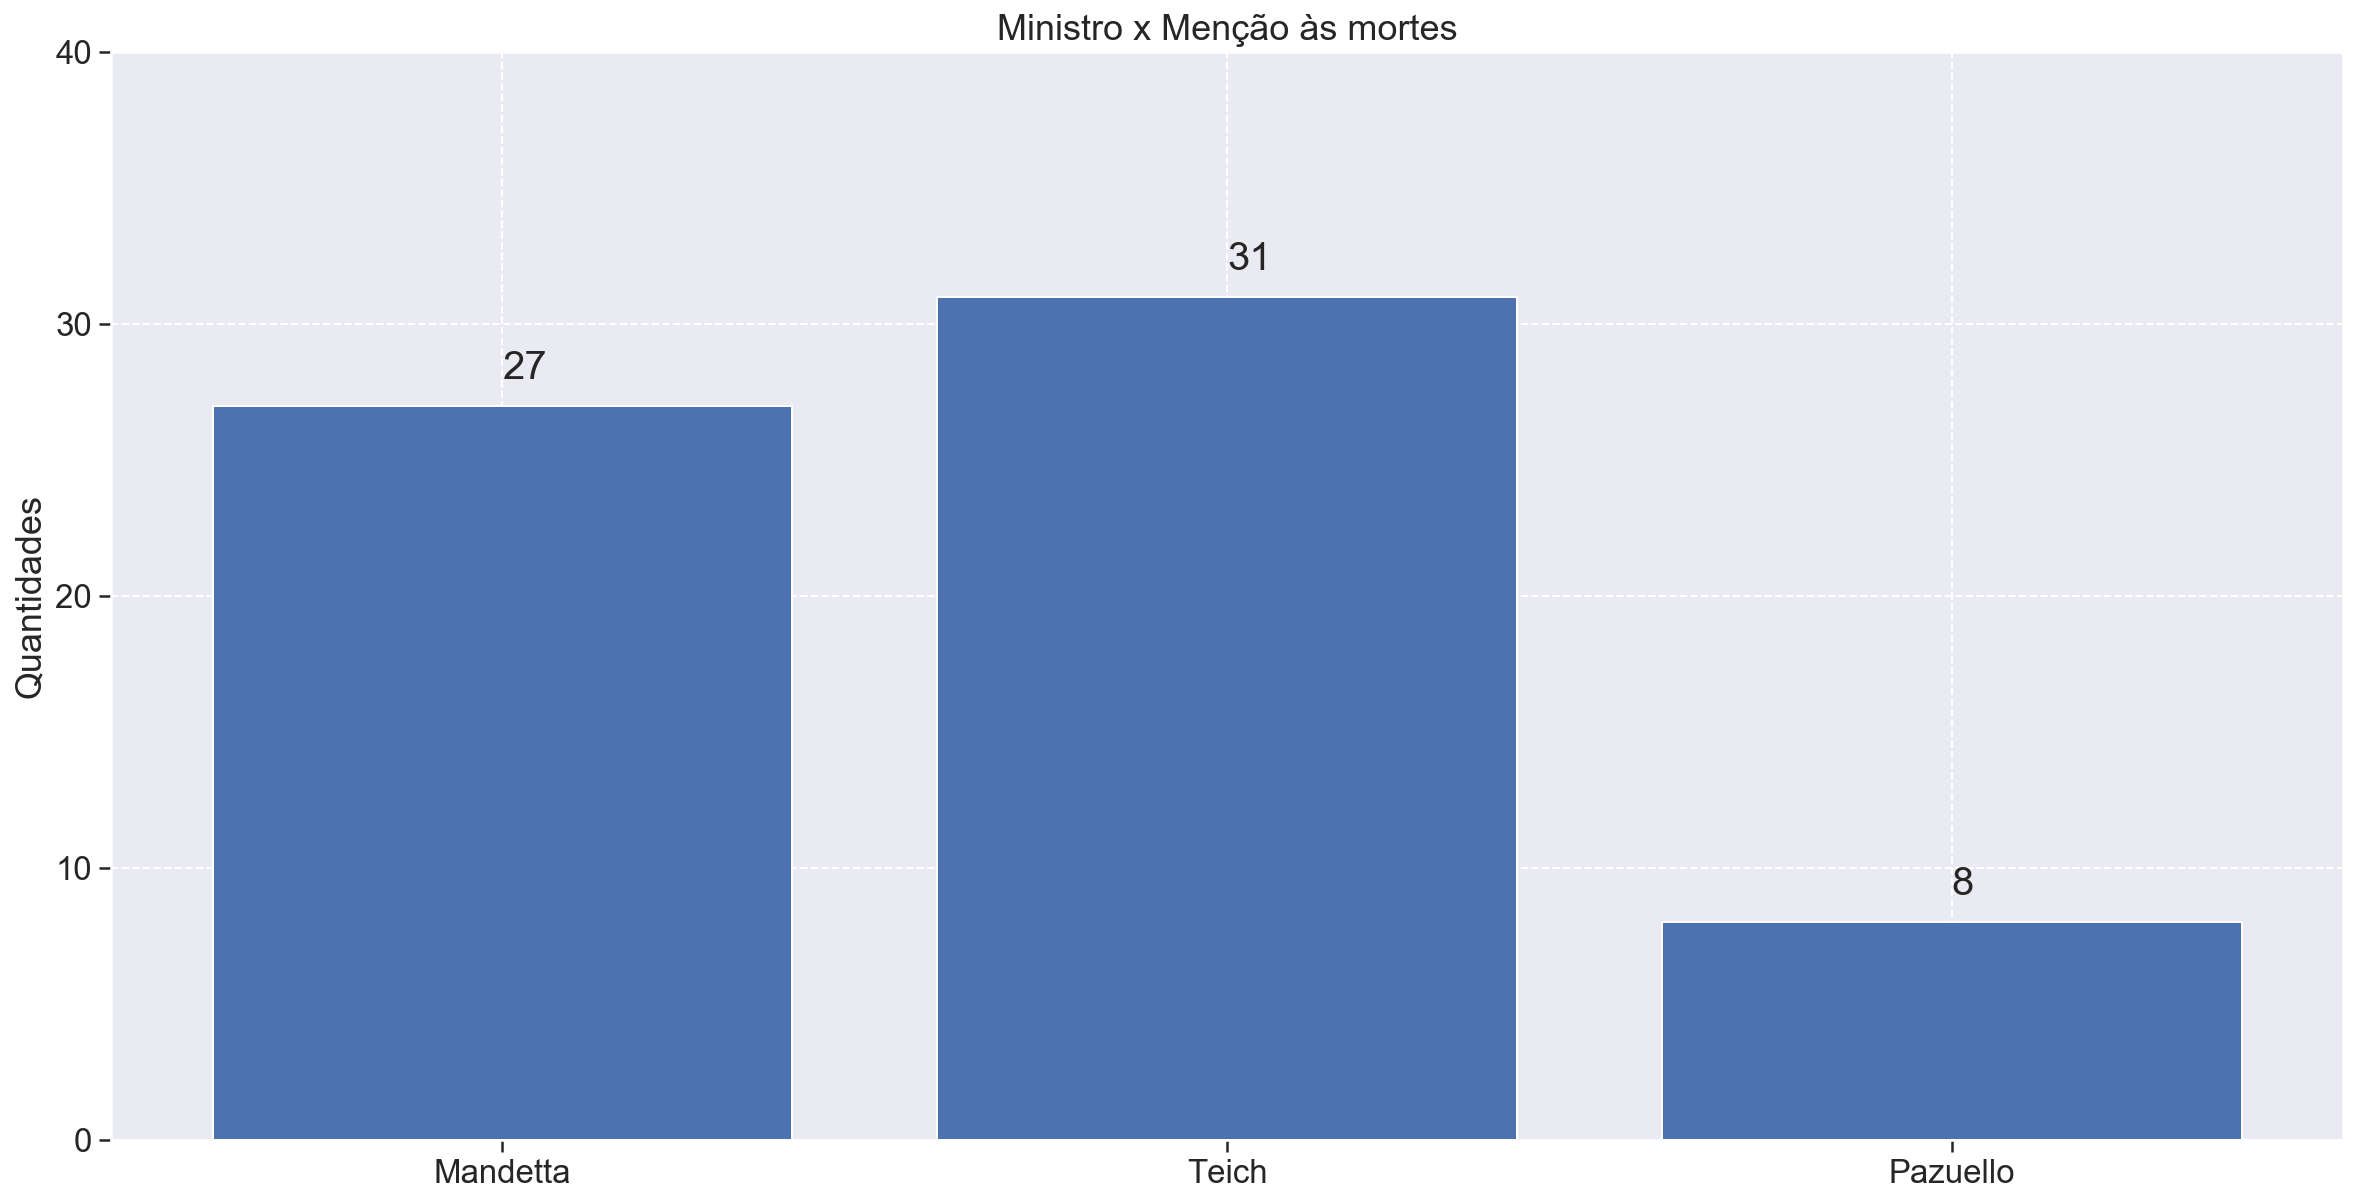

In [29]:
fig=plt.figure(figsize=(20,10))

# Make a fake dataset:
height=[len(mandetta_morte), len(teich_morte), len(pazuello_morte)]
bars=('Mandetta', 'Teich', 'Pazuello')
y_pos=np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.yticks(np.arange(0, 50, 10))

# Text on the top of each barplot
for i in range(len(height)):
    plt.text(x = x_pos[i] -.0, y = height[i]+1, s = height[i], size = 20)
    # plt.text(x = -.4, y = height[0]+1, s = height[0], size = 22)

# Titles
plt.title('Ministro x Menção às mortes')
plt.ylabel('Quantidades')

# Show graphic
plt.show()